<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Necessary-imports-and-shared-functions-aggragated" data-toc-modified-id="Necessary-imports-and-shared-functions-aggragated-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Necessary imports and shared functions aggragated</a></span><ul class="toc-item"><li><span><a href="#Packages" data-toc-modified-id="Packages-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Packages</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Run-doctest" data-toc-modified-id="Run-doctest-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Run doctest</a></span></li></ul></li><li><span><a href="#Explore-and-Preprocess-data" data-toc-modified-id="Explore-and-Preprocess-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Explore and Preprocess data</a></span><ul class="toc-item"><li><span><a href="#Dataset-of-health-expenditure" data-toc-modified-id="Dataset-of-health-expenditure-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Dataset of health expenditure</a></span></li><li><span><a href="#Dataset-of-some-combined-objects" data-toc-modified-id="Dataset-of-some-combined-objects-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Dataset of some combined objects</a></span></li><li><span><a href="#Dataset-of-household-scale" data-toc-modified-id="Dataset-of-household-scale-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Dataset of household scale</a></span></li></ul></li><li><span><a href="#Explore-Hypotheses" data-toc-modified-id="Explore-Hypotheses-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Explore Hypotheses</a></span><ul class="toc-item"><li><span><a href="#Hypothese-1" data-toc-modified-id="Hypothese-1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Hypothese-1</a></span></li><li><span><a href="#Hypothese-2" data-toc-modified-id="Hypothese-2-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Hypothese-2</a></span></li><li><span><a href="#Hypothese-3" data-toc-modified-id="Hypothese-3-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Hypothese-3</a></span></li></ul></li><li><span><a href="#Summary-and-Future-work" data-toc-modified-id="Summary-and-Future-work-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Summary and Future work</a></span><ul class="toc-item"><li><span><a href="#Summary-of-the-conclusions-reached-above" data-toc-modified-id="Summary-of-the-conclusions-reached-above-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Summary of the conclusions reached above</a></span></li><li><span><a href="#Where-to-improve-and-future-work" data-toc-modified-id="Where-to-improve-and-future-work-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Where to improve and future work</a></span></li></ul></li><li><span><a href="#Detailed-resources" data-toc-modified-id="Detailed-resources-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Detailed resources</a></span></li></ul></div>

## Necessary imports and shared functions aggragated

Before laying out the project, first gather all the packages needed and all the functions that need to be used.

### Packages

In [1]:
# import packages that used in the project
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
%matplotlib inline 
import matplotlib
import ipywidgets
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.display import HTML, display
import doctest

### Functions

In [2]:
def melt_year_data(df, split_column, id_var, on_column):
    """
    The function aims to melt the original data from time series matrix style to one dimension table
    and also using the categories in the melt_column as the new column names, whcih is bettter for 
    the later data merge and process.
    
    :param df: the dataframe that needs to be melted.
    :param split_column: the category column whose categories would turn into new columns.
    :param id_var: the id varible that used in melting.
    :param on_column: the on_column decides on which colomn or columns the branch dataframe be merged.
    :return: a dataframe that has been melted

    """
    melt_col_list = df[split_column].unique().tolist()
    df_list = []
    
    # melt each dataframe categoried by the category column
    for cate in melt_col_list:
        df_copy = df[df[split_column]==cate]
        df_copy = df_copy.drop(columns=split_column)
        df_copy = df_copy.melt(id_vars=id_var, var_name='year', value_name=cate)
        df_list.append(df_copy)

    # merge these data branch to a complete dataframe    
    new_df = reduce(lambda left,right: pd.merge(left, right, on=on_column, how='inner'), df_list)
    
    return new_df

In [3]:
def replace_col_name(df, from_col_list, to_col_list):
    """
    The function aims to repalce the columns' names together to get rid of too long column names.
    It can make the columns better and easy to be retrived and processed.
    
    :param df: the dataframe that needs to be melted.
    :param from_col_list: the list of the original columns' names from which it changes.
    :param to_col_list: the list of the new columns' names to which it changes.
    :return: The dataframe with new changed column names. 

    >>> df_example = pd.DataFrame({'A':np.arange(5),'B':['A','C','D','B','E']})
    >>> df_example.columns
    Index(['A', 'B'], dtype='object')
    >>> replace_col_name(df_example,['A','B'], ['number','letter']).columns
    Index(['number', 'letter'], dtype='object')
    >>> replace_col_name(df_example,['A'], ['number','letter'])
    'The length of the two column list is not eaqual, Please check!'
    """
    if len(from_col_list) != len(to_col_list):
        return('The length of the two column list is not eaqual, Please check!')
    
    else:
        for i in range(len(from_col_list)):
            df = df.rename(columns={from_col_list[i]: to_col_list[i]})
        return df
    
doctest.testmod(name='auto_test', verbose=True)

Trying:
    df_example = pd.DataFrame({'A':np.arange(5),'B':['A','C','D','B','E']})
Expecting nothing
ok
Trying:
    df_example.columns
Expecting:
    Index(['A', 'B'], dtype='object')
ok
Trying:
    replace_col_name(df_example,['A','B'], ['number','letter']).columns
Expecting:
    Index(['number', 'letter'], dtype='object')
ok
Trying:
    replace_col_name(df_example,['A'], ['number','letter'])
Expecting:
    'The length of the two column list is not eaqual, Please check!'
ok
2 items had no tests:
    auto_test
    auto_test.melt_year_data
1 items passed all tests:
   4 tests in auto_test.replace_col_name
4 tests in 3 items.
4 passed and 0 failed.
Test passed.


TestResults(failed=0, attempted=4)

In [4]:
def change_dtype(df,change_list,to_type):
    """
    This function is used for changing the date type of related columns for diferent use. 
    Mostly, the project use this function to turn non-numeric data to numeric data for better calculation or plot.
    
    :param df: The dataframe that includes the columns of which the data type need to be changed.
    :param change_list: The columns of which the data type need to be changed.
    :param to_type: The target data type one means to change to.
    
    >>> df_example = pd.DataFrame({'A':np.arange(5),'B':['A','C','D','B','E']})
    >>> df_example['A'].dtypes
    dtype('int64')
    >>> df_new = change_dtype(df_example,['A'],'float64')
    >>> df_example['A'].dtypes
    dtype('float64')
    >>> df_example['B'].dtypes
    dtype('O')
    >>> change_dtype(df_example,['B'],'float64')
    'column B is not able to be change to type float64'
    """
    for i in change_list:
        try:
            df[i] = df[i].astype(to_type)
        except:
            return('column {} is not able to be change to type {}'.format(i,to_type))
            break
            
    return df

doctest.testmod(name='auto_test', verbose=True)

Trying:
    df_example = pd.DataFrame({'A':np.arange(5),'B':['A','C','D','B','E']})
Expecting nothing
ok
Trying:
    df_example['A'].dtypes
Expecting:
    dtype('int64')
ok
Trying:
    df_new = change_dtype(df_example,['A'],'float64')
Expecting nothing
ok
Trying:
    df_example['A'].dtypes
Expecting:
    dtype('float64')
ok
Trying:
    df_example['B'].dtypes
Expecting:
    dtype('O')
ok
Trying:
    change_dtype(df_example,['B'],'float64')
Expecting:
    'column B is not able to be change to type float64'
ok
Trying:
    df_example = pd.DataFrame({'A':np.arange(5),'B':['A','C','D','B','E']})
Expecting nothing
ok
Trying:
    df_example.columns
Expecting:
    Index(['A', 'B'], dtype='object')
ok
Trying:
    replace_col_name(df_example,['A','B'], ['number','letter']).columns
Expecting:
    Index(['number', 'letter'], dtype='object')
ok
Trying:
    replace_col_name(df_example,['A'], ['number','letter'])
Expecting:
    'The length of the two column list is not eaqual, Please check!'
ok
2 item

TestResults(failed=0, attempted=10)

In [5]:
def high_corelation_detail(df,cate_col,indepen_col,depen_col,sig):
    """
    This function is a simple correlation analysis, whcih is designed especially for the use of gathering correlation data 
    of those countries have a certain correlation coefficient between the potential indepen_cols
    (here 'forest_area_coverage%' and 'fuel_export%') and depen_col (here 'capital_expenditure').
    
    :param df: The original dataframe that needed to do the correlation analysis.
    :param cate_col: The column used as the category indedx.
    :param indepen_col: The main varibles we focus on and treat as independent variable.
    :param depen_col: The main variable we treat as dependent variable.
    :param sig: The limit on coefficients that are filtered and displayed.
    """
    cor_list=[]
    loop_list = df[cate_col].unique().tolist()
    for value in loop_list:
        corr_df = df[df[cate_col] == value].loc[:,[indepen_col, depen_col]]
        c = corr_df.corr(min_periods=15)
        c_triu = c.where(~np.tril(np.ones(c.shape)).astype(np.bool))
        c_triu_trim = c_triu[[depen_col]].copy()
        so = c_triu_trim[(c_triu_trim[depen_col].abs()>= sig)]
        so.insert(1, cate_col, value)
        cor_list.append(so)
    cor_df = pd.concat(cor_list)
    return cor_df

In [6]:
def model_regression_result(df,depen_var, var2, if_highlight, if_plot):
    """
    This function uses some statistical packages to show statistical data about the objected variables.
    It can show different statistical results of the input varibles can highlight the certain results we need to 
    analyze, they are seperatively: Adj. R-squared,coef,std err,P>|t| and intervals.
    
    There is also a choice for you to choose whether you need further plot of the regression of the variables.
    If true, it would show the plot, else just show the statistical results.
    
    :param df: The dataframe that includes the intended variables.
    :param depen_var: The column treated as dependent variable.
    :param var2: The column name that treated as independent variable.
    :param if_plot: Choose to highlight important statistical results, true/false.
    :param if_plot: Choose to plot, true/false.
    
    >>> df_example = pd.DataFrame({'A':np.arange(2,51,2),'B':np.arange(1,26)})
    >>> model_stat = model_regression_result(df_example,'A', 'B', False,False)
    >>> results_as_html = model_stat.tables[1].as_html()
    >>> pd.read_html(results_as_html, header=0, index_col=0)[0]['P>|t|'][0]
    0.495
    """
    # build mode using package statsmodels
    variable_relation = depen_var + ' ~ ' + var2
    model = smf.ols(variable_relation, data=df).fit()
    #predictions = model.predict(X) # make the predictions by the model

    # Print out the statistics and highlight some important index
    model_sum = model.summary() 
    
    if if_highlight==True:
        # do highlight
        model_sum = HTML((model_sum
            .as_html()
            .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
            .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
            .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
            .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
            .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
        )

    # plot
    if if_plot==True:
        # plot part
        fig = plt.figure(figsize=(10,7))
        fig = sm.graphics.plot_regress_exog(model, var2)

    return model_sum

doctest.testmod(name='auto_test', verbose=True)

Trying:
    df_example = pd.DataFrame({'A':np.arange(5),'B':['A','C','D','B','E']})
Expecting nothing
ok
Trying:
    df_example['A'].dtypes
Expecting:
    dtype('int64')
ok
Trying:
    df_new = change_dtype(df_example,['A'],'float64')
Expecting nothing
ok
Trying:
    df_example['A'].dtypes
Expecting:
    dtype('float64')
ok
Trying:
    df_example['B'].dtypes
Expecting:
    dtype('O')
ok
Trying:
    change_dtype(df_example,['B'],'float64')
Expecting:
    'column B is not able to be change to type float64'
ok
Trying:
    df_example = pd.DataFrame({'A':np.arange(2,51,2),'B':np.arange(1,26)})
Expecting nothing
ok
Trying:
    model_stat = model_regression_result(df_example,'A', 'B', False,False)
Expecting nothing
ok
Trying:
    results_as_html = model_stat.tables[1].as_html()
Expecting nothing
ok
Trying:
    pd.read_html(results_as_html, header=0, index_col=0)[0]['P>|t|'][0]
Expecting:
    0.495
ok
Trying:
    df_example = pd.DataFrame({'A':np.arange(5),'B':['A','C','D','B','E']})
Expecting

TestResults(failed=0, attempted=14)

## Explore and Preprocess data

The orignal datasets are all relatively in a mess and of various kinds and styles, so much attention should be paid to make the data suitable for analysis. So first take a look at and trim the three datasets I need to use one by one.

### Dataset of health expenditure

In [7]:
# Data of health expenditure
expenditure_origin = pd.read_excel('Health_expenditure.xlsx')
expenditure_origin.head()

,Countries,Indicators,Unnamed: 2,2000,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,NaN,NaN,Value,Value,Value,Value,Value,Value,Value,...,Value,Value,Value,Value,Value,Value,Value,Value,Value,Value
1,Algeria,Current health expenditure by revenues of heal...,in million constant (2017) US$,3254.44,3687.23,3784.29,3916.46,4020.27,3886.35,4098.34,...,5431.04,7040.24,6965.12,7372.11,8682.79,8978.35,10109.2,11173.8,10912.3,10680.5
2,Algeria,Capital health expenditure,in million constant (2017) US$,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.6667,NaN,NaN
3,Algeria,Population (in thousands),NaN,31183.7,31592.2,31995,32403.5,32831.1,33288.4,33777.9,...,34860.7,35465.8,36117.6,36819.6,37565.8,38338.6,39113.3,39871.5,40606.1,41318.1
4,Angola,Current health expenditure by revenues of heal...,in million constant (2017) US$,825.303,2020.25,1705.25,1871.49,2321.83,1920.14,2016.72,...,3162.63,3688.66,2712.84,2755.48,2708.39,3242.53,3027.4,3271.49,3318.4,3409.09


In [8]:
# See the target category for later columns
expenditure_origin['Indicators'].unique()

array([nan,
       'Current health expenditure by revenues of health care financing schemes',
       'Capital health expenditure', 'Population (in thousands)'],
      dtype=object)

Things we need to do for this dataset:

1. Delete unrelated columns like 'Unnamed 2:' and delete meaningless rows when 'Countries' or 'Indicator' is NaN.
2. The columns is time series, which is not good for this analysis, so they should be melted into different rows of data.
3. Meanwhile, see the unique object of 'Indicators', they are actually important data about each related index and should better be put as different columns with simpler column names.
4. Round the data to three decimals

In [9]:
# Trim
expenditure = expenditure_origin.drop(columns=['Unnamed: 2'])
expenditure = expenditure.dropna(subset=['Indicators','Countries'])

In [10]:
# using the melt_year_data function to melt data
expen_split_val = 'Indicators'
expen_id_var = ['Countries']
expen_on_columns = ['Countries','year']
expenditure_new = melt_year_data(expenditure,expen_split_val, expen_id_var,expen_on_columns)

In [11]:
# using the replace_col_name function to replace those too long column names
expen_ori_col = ['Current health expenditure by revenues of health care financing schemes','Capital health expenditure','Population (in thousands)']
expen_to_col = ['expenditure_by_revenues','capital_expenditure','population_in_thousands']
expenditure_new = replace_col_name(expenditure_new, expen_ori_col, expen_to_col)
expenditure_new.head()

,Countries,year,expenditure_by_revenues,capital_expenditure,population_in_thousands
0,Algeria,2000,3254.44,NaN,31183.7
1,Angola,2000,825.303,121.347,16440.9
2,Benin,2000,193.518,NaN,6865.95
3,Botswana,2000,501.168,26.9099,1728.34
4,Burkina Faso,2000,156.734,NaN,11607.9


In [12]:
# change data type
expenditure_new = change_dtype(expenditure_new,expen_to_col,'float')

# round 3 decimal
expenditure_new = expenditure_new.round(3)
expenditure_new.head()

# for col in expen_to_col:
#     expenditure_new[col] = expenditure_new[col].astype('float')    
# expenditure_new['year'] = expenditure_new['year'].astype('str')
# expenditure_new = expenditure_new.round(3)

,Countries,year,expenditure_by_revenues,capital_expenditure,population_in_thousands
0,Algeria,2000,3254.438,NaN,31183.660
1,Angola,2000,825.303,121.347,16440.924
2,Benin,2000,193.518,NaN,6865.951
3,Botswana,2000,501.168,26.910,1728.340
4,Burkina Faso,2000,156.734,NaN,11607.942


### Dataset of some combined objects

In [13]:
# Dataset of combined variables including forest coverage, fuel export, gdp and etc.
combined_origin = pd.read_csv('Combined_data_climate_DDP.csv')
combined_origin.head()

,Series Name,Series Code,Country Name,Country Code,1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],...,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Forest area (% of land area),AG.LND.FRST.ZS,Afghanistan,AFG,..,..,..,..,..,..,...,2.06782464846981,2.06782464846981,2.06782464846981,2.06782464846981,2.06782464846981,2.06782464846981,2.06782464846981,..,..,..
1,Forest area (% of land area),AG.LND.FRST.ZS,Albania,ALB,..,..,..,..,..,..,...,28.3321163428091,28.2970812720974,28.2620439738253,28.2270066755531,28.1919716048415,28.1569343065693,28.1218970082972,..,..,..
2,Forest area (% of land area),AG.LND.FRST.ZS,Algeria,DZA,..,..,..,..,..,..,...,0.805293608874184,0.808484543059251,0.811675477244317,0.814866462681959,0.818057396867022,0.821248331052088,0.824439265237154,..,..,..
3,Forest area (% of land area),AG.LND.FRST.ZS,American Samoa,ASM,..,..,..,..,..,..,...,88.5499954223635,88.400001525879,88.199996948242,88.050003051758,87.8999996185305,87.7000045776365,87.5,..,..,..
4,Forest area (% of land area),AG.LND.FRST.ZS,Andorra,AND,..,..,..,..,..,..,...,34.0425531914894,34.0425531914894,34.0425531914894,34.0425531914894,34.0425531914894,34.0425531914894,34.0425531914894,..,..,..


In [14]:
combined_origin['Series Name'].unique()

array(['Forest area (% of land area)', 'GDP (current US$)',
       'GDP growth (annual %)', 'Fuel exports (% of merchandise exports)',
       'GDP per capita (current US$)', 'GDP per capita growth (annual %)',
       'Population growth (annual %)',
       'Population density (people per sq. km of land area)', nan,
       'Data from database: World Development Indicators',
       'Last Updated: 04/09/2020'], dtype=object)

Things we need to do for this dataset:

1. Delete unrelated columns like 'Series Code' and 'Country Code' and delete rows with NaN 'Series Name' and 'Country Name'
2. Replace meaningless str like '..' with NaN
3. Remove the [YRXXXX] in year columns(actually values in rows after melting), we just need the exact year number
3. The columns is time series, which is not good for this analysis, so they should be melted into different rows of data.
4. Meanwhile, see the unique object of 'Series Name', they are actually important data about each related index and should better be put as different columns with simpler column names.
5. Round the data to three decimals

In [15]:
# Trim the data
combined = combined_origin.drop(columns=['Series Code','Country Code'])
combined.dropna(subset=['Series Name', 'Country Name'], inplace=True)
combined = combined.replace(['..'],'NaN')

In [16]:
# using the melt_year_data function to melt data
com_split_val = 'Series Name'
com_id_var = ['Country Name']
com_on_columns = ['Country Name','year']
combined_new = melt_year_data(combined,com_split_val, com_id_var,com_on_columns)

In [17]:
# using the replace_col_name function to replace those too long column names
com_ori_col = ['Forest area (% of land area)', 'GDP (current US$)','GDP growth (annual %)', 'Fuel exports (% of merchandise exports)',
       'GDP per capita (current US$)', 'GDP per capita growth (annual %)','Population growth (annual %)',
       'Population density (people per sq. km of land area)']
com_to_col = ['forest_area_coverage%','gdp', 'gdp_growth%','fuel_export%',
                'gdp_capital','gdp_growth_capital%','population_growth%','population_density']
combined_new = replace_col_name(combined_new, com_ori_col, com_to_col)
combined_new.head()

,Country Name,year,forest_area_coverage%,gdp,gdp_growth%,fuel_export%,gdp_capital,gdp_growth_capital%,population_growth%,population_density
0,Afghanistan,1970 [YR1970],NaN,1748886595.55556,NaN,16.9461490985105,156.518939442982,NaN,2.53659948895689,17.1149128450204
1,Albania,1970 [YR1970],NaN,NaN,NaN,NaN,NaN,NaN,2.55085117829323,77.9371897810219
2,Algeria,1970 [YR1970],NaN,4863487492.65763,8.86265710850964,70.2364681696297,336.224855584547,5.82772263097309,2.8274547451992,6.07328465743532
3,American Samoa,1970 [YR1970],NaN,NaN,NaN,NaN,NaN,NaN,2.4415817221227,136.815
4,Andorra,1970 [YR1970],NaN,78619206.0850963,NaN,NaN,3238.55684977329,NaN,5.14754271628468,51.6510638297872


In [18]:
# change data type
combined_new = change_dtype(combined_new ,com_to_col,'float')

# round 3 decimal
combined_new = combined_new.round(3)
combined_new.head()

,Country Name,year,forest_area_coverage%,gdp,gdp_growth%,fuel_export%,gdp_capital,gdp_growth_capital%,population_growth%,population_density
0,Afghanistan,1970 [YR1970],NaN,1.748887e+09,NaN,16.946,156.519,NaN,2.537,17.115
1,Albania,1970 [YR1970],NaN,NaN,NaN,NaN,NaN,NaN,2.551,77.937
2,Algeria,1970 [YR1970],NaN,4.863487e+09,8.863,70.236,336.225,5.828,2.827,6.073
3,American Samoa,1970 [YR1970],NaN,NaN,NaN,NaN,NaN,NaN,2.442,136.815
4,Andorra,1970 [YR1970],NaN,7.861921e+07,NaN,NaN,3238.557,NaN,5.148,51.651


In [19]:
# remove unrelated string in year
combined_new['year'] = combined_new['year'].str.split(expand=True).iloc[:,0:1]
combined_new.head()

,Country Name,year,forest_area_coverage%,gdp,gdp_growth%,fuel_export%,gdp_capital,gdp_growth_capital%,population_growth%,population_density
0,Afghanistan,1970,NaN,1.748887e+09,NaN,16.946,156.519,NaN,2.537,17.115
1,Albania,1970,NaN,NaN,NaN,NaN,NaN,NaN,2.551,77.937
2,Algeria,1970,NaN,4.863487e+09,8.863,70.236,336.225,5.828,2.827,6.073
3,American Samoa,1970,NaN,NaN,NaN,NaN,NaN,NaN,2.442,136.815
4,Andorra,1970,NaN,7.861921e+07,NaN,NaN,3238.557,NaN,5.148,51.651


### Dataset of household scale

In [20]:
household_origin = pd.read_csv('population_division_Houseshold_Size.csv')
household_origin.head()

,Country or area,ISO Code,Data source category,Reference date (dd/mm/yyyy),Average household size (number of members),1 member,2-3 members,4-5 members,6 or more members,Unnamed: 9,...,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99
0,Afghanistan,4,DHS,2015/10/19,8.04,0.19,6.45,16.84,76.52,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,8,DHS,2009/1/21,3.82,6.15,38.23,39.97,15.65,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,8,DYB,2011/7/1,3.86,..,..,..,..,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,8,DHS,2017/12/1,3.30,9.95,48.08,32.51,9.45,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,24,DHS,2007/1/29,5.69,4.08,19.10,30.13,46.69,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Things we need to do for this dataset:

1. Delete unrelated columns like all columns with 'Unnamed:' and delete meaningless rows when 'Countries' or 'Indicator' is NaN.
2. In the column 'Reference date (dd/mm/yyyy)', we only need the year data in it, so we need to extract year data to replace this column and change the name.
3. Round the data to three decimals

In [21]:
# proess unrelated columns and rows
household = household_origin.iloc[:,0:9].copy()
household = household.drop(columns=['ISO Code','Data source category'])
household = household.replace(['..'],'NaN')

# only keep year data
household['year'] = pd.DatetimeIndex(household['Reference date (dd/mm/yyyy)']).year
household = household.drop(columns=['Reference date (dd/mm/yyyy)'])

# change data type
household_col = ['Average household size (number of members)','1 member','2-3 members','4-5 members','6 or more members']
household = change_dtype(household,household_col, 'float')

# round to 3 decmals
household = household.round(3)
household.head()

,Country or area,Average household size (number of members),1 member,2-3 members,4-5 members,6 or more members,year
0,Afghanistan,8.04,0.19,6.45,16.84,76.52,2015
1,Albania,3.82,6.15,38.23,39.97,15.65,2009
2,Albania,3.86,NaN,NaN,NaN,NaN,2011
3,Albania,3.30,9.95,48.08,32.51,9.45,2017
4,Angola,5.69,4.08,19.10,30.13,46.69,2007


So far, we can see the three dataset is relatively clear and clean and more suitable for later merge and analysis.

## Explore Hypotheses 

### Hypothese-1

Hypothese-1: As the increase of fuel export and decrease of Forest Coverage, the annual health expenditure per capital would increase accordingly.

In [22]:
expenditure_new.head()

,Countries,year,expenditure_by_revenues,capital_expenditure,population_in_thousands
0,Algeria,2000,3254.438,NaN,31183.660
1,Angola,2000,825.303,121.347,16440.924
2,Benin,2000,193.518,NaN,6865.951
3,Botswana,2000,501.168,26.910,1728.340
4,Burkina Faso,2000,156.734,NaN,11607.942


In [23]:
combined_new.head()

,Country Name,year,forest_area_coverage%,gdp,gdp_growth%,fuel_export%,gdp_capital,gdp_growth_capital%,population_growth%,population_density
0,Afghanistan,1970,NaN,1.748887e+09,NaN,16.946,156.519,NaN,2.537,17.115
1,Albania,1970,NaN,NaN,NaN,NaN,NaN,NaN,2.551,77.937
2,Algeria,1970,NaN,4.863487e+09,8.863,70.236,336.225,5.828,2.827,6.073
3,American Samoa,1970,NaN,NaN,NaN,NaN,NaN,NaN,2.442,136.815
4,Andorra,1970,NaN,7.861921e+07,NaN,NaN,3238.557,NaN,5.148,51.651


In [24]:
# merge the two dataset
one_merge = combined_new.merge(expenditure_new, left_on=['Country Name','year'],
                               right_on=['Countries','year']).drop(columns=['Countries'])
#hypo1_df = one_merge[['Country Name','year','forest_area_coverage%','fuel_export%','expenditure_by_revenues','capital_expenditure']].copy()
# prepare the year list and acountry list
year_list = one_merge['year'].unique().tolist()
country_list = one_merge['Country Name'].unique().tolist()

In [25]:
# take a first look at the correlation coefficient
one_merge.corr()

,forest_area_coverage%,gdp,gdp_growth%,fuel_export%,gdp_capital,gdp_growth_capital%,population_growth%,population_density,expenditure_by_revenues,capital_expenditure,population_in_thousands
forest_area_coverage%,1.000000,0.029024,-0.079594,0.018556,-0.031449,-0.033995,-0.150313,-0.123457,0.051717,0.003201,-0.060288
gdp,0.029024,1.000000,-0.025834,-0.030467,0.179331,0.013086,-0.133988,-0.018547,0.938421,0.892544,0.587365
gdp_growth%,-0.079594,-0.025834,1.000000,0.058967,-0.117473,0.952818,0.212422,-0.009712,-0.067122,0.008292,0.098178
fuel_export%,0.018556,-0.030467,0.058967,1.000000,0.099495,-0.005431,0.188065,-0.043073,-0.053690,-0.041433,-0.013349
gdp_capital,-0.031449,0.179331,-0.117473,0.099495,1.000000,-0.109799,-0.045194,0.558268,0.233895,0.117616,-0.070193
gdp_growth_capital%,-0.033995,0.013086,0.952818,-0.005431,-0.109799,1.000000,-0.079872,-0.008775,-0.021267,0.032408,0.113228
population_growth%,-0.150313,-0.133988,0.212422,0.188065,-0.045194,-0.079872,1.000000,-0.005283,-0.153623,-0.088699,-0.037149
population_density,-0.123457,-0.018547,-0.009712,-0.043073,0.558268,-0.008775,-0.005283,1.000000,-0.025445,-0.028079,-0.015241
expenditure_by_revenues,0.051717,0.938421,-0.067122,-0.053690,0.233895,-0.021267,-0.153623,-0.025445,1.000000,0.827893,0.445553
capital_expenditure,0.003201,0.892544,0.008292,-0.041433,0.117616,0.032408,-0.088699,-0.028079,0.827893,1.000000,0.586427


From the result above, we can see the correlation between capital expenditure and forest coverage is 0.003201 and between capital expenditure and fuel export is -0.041433, both are quite small that shows, from a general numeric level, the relationship of them with capital expenditure is very weak. So I went to another direction to dicover something else.

In [26]:
# From the perspective of different year to see if there is a relation of each year

# interactive plot 
@ipywidgets.interact(Year=year_list)
def corr_heatmap(Year):
    # extract some columns for use
    corr_df =one_merge[one_merge['year'] == Year].loc[:,['forest_area_coverage%','fuel_export%','expenditure_by_revenues','capital_expenditure']]

    # plot
    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(corr_df.corr(), annot = True, cmap= 'Paired', linewidths=1, 
                square=True, linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
      # beautify
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right')

    # solve the problem of broken sns heatmap
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

interactive(children=(Dropdown(description='Year', options=('2000', '2001', '2002', '2003', '2004', '2005', '2…

As we can see from above, the absolute correlation coeffients between expenditure things and forest coverage fuel export things are all less than 0.2, so there is very weak correlation or almost no linear relationship between them from a general degree.

So I try another degree, we do not use year as the category, but see each country specially as a case to see which country has strong relationship between these variables and which not.

In [27]:
# From the perspective of different countries to see if there is some paralell rule or rule inside certain countries.

# interaction plot
@ipywidgets.interact(Country=country_list)
def corr_heatmap(Country):
    # extract some columns for use
    corr_df = one_merge[one_merge['Country Name'] == Country].loc[:,['forest_area_coverage%','fuel_export%','expenditure_by_revenues','capital_expenditure']]

    # plot
    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(corr_df.corr(), annot = True, cmap= 'Paired', linewidths=1, 
                square=True, linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right') # do some beautification
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right')

    # solve the problem of broken sns heatmap
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

interactive(children=(Dropdown(description='Country', options=('Afghanistan', 'Algeria', 'Angola', 'Antigua an…

In [28]:
#expen_cols = ['expenditure_by_revenues','capital_expenditure']
hyp1_cols = ['forest_area_coverage%','fuel_export%']
high_corelation_detail(one_merge,'Country Name',hyp1_cols[0],'capital_expenditure',0.8)

# other filter based on the limit of coefficient
#high_corelation_detail(one_merge,'Country Name',hyp1_cols[0],'capital_expenditure',0.6)
#high_corelation_detail(one_merge,'Country Name',hyp1_cols[0],'capital_expenditure',0.4)

,capital_expenditure,Country Name
forest_area_coverage%,-0.858539,Argentina
forest_area_coverage%,0.973971,Austria
forest_area_coverage%,-0.812526,Cameroon
forest_area_coverage%,0.903692,China
forest_area_coverage%,-0.860792,Czech Republic
forest_area_coverage%,0.847880,Denmark
forest_area_coverage%,0.852247,France
forest_area_coverage%,0.889644,India
forest_area_coverage%,0.909980,Morocco
forest_area_coverage%,-0.860635,Myanmar


In [29]:
high_corelation_detail(one_merge,'Country Name',hyp1_cols[1],'capital_expenditure',0.8)

# other filter based on the limit of coefficient
#high_corelation_detail(one_merge,'Country Name',hyp1_cols[1],'capital_expenditure',0.6)
#high_corelation_detail(one_merge,'Country Name',hyp1_cols[1],'capital_expenditure',0.4)

,capital_expenditure,Country Name
fuel_export%,0.841505,Colombia
fuel_export%,-0.899271,Greece
fuel_export%,0.858482,Sri Lanka


So here is a small conclusion that generally there is no significant relationship between capital expenditure and forest coverage or fuel export no matter from the total data or divided as different years of data, however, when treated seperatively as different country, some countries have very high relation while some countries not. And we can just filter and display these countries above.

### Hypothese-2

Hypothese-2: The health expenditure per capital or expenditure by revenue may have a linear relationship with GDP.

In [30]:
model_regression_result(one_merge,'expenditure_by_revenues','gdp',True,False)

<Figure size 720x504 with 0 Axes>

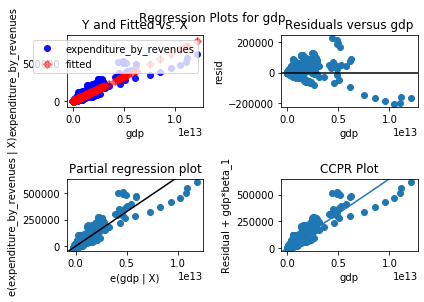

In [31]:
model_regression_result(one_merge,'expenditure_by_revenues','gdp',True,True)

The adj.R-squared means that 88.1% of expenditure_by_revenues can be explain by the varible gdp.

The coef(regression coefficient) represents the change in the dependent variable resulting from a one unit change in the predictor variable, all other variables being held constant. In our model, a one unit increase in gdp increase expenditure_by_revenues by 6.5e-08, it is a minearal change.

The standard error measures the accuracy of expenditure_by_revenues's coefficient by estimating the variation of the coefficient if the same test were run on a different sample of our data. Our standard error, 4.72e-10, is very low and therefore appears relatively accurate.

A low p-value indicates that the results are statistically significant, that is in general the p-value is less than 0.05. Here,the p-value means the probability of an 6.5e-08 increase in expenditure_by_revenues due to a one unit increase in gdp is 0%, assuming there is no relationship between the two variables.

The confidence interval is a range within which our coefficient is likely to fall. We can be 95% confident that gdp's coefficient will be within our confidence interval [6.41e-08, 6.59e-08].

The above relationship seems to be a little close to linear but there still has some unmatched palce, so I do a further hypothese and test, using the data divided by different years.

In [32]:
# A glance of the lineplot
# plt.figure(figsize=(5,3))
# ax = sns.lineplot(data=one_merge, x='expenditure_by_revenues',y='gdp', legend=False, sort=False)

In [33]:
@ipywidgets.interact(Year=year_list)
def regression_plot(Year):
    # extract some columns for use
    one_merge_single_year = one_merge[one_merge['year']==Year]
    
    # model and plot
    info = model_regression_result(one_merge_single_year,'expenditure_by_revenues','gdp',True,True)
    
    return info

interactive(children=(Dropdown(description='Year', options=('2000', '2001', '2002', '2003', '2004', '2005', '2…

It seems to be more on track than the general total, and as you change the year, threre is different but relatively more likely to show there is relationship between our variables, so far I consider there is highly possible that a simple linear corelation exists between the expenditure and gdp, but there maybe other middle or multi variables between them so more need to be test and study.

### Hypothese-3

Hypothese-3: The health expenditure per capital or expenditure by revenue may have relation with the household scale.

In [34]:
household.head()

,Country or area,Average household size (number of members),1 member,2-3 members,4-5 members,6 or more members,year
0,Afghanistan,8.04,0.19,6.45,16.84,76.52,2015
1,Albania,3.82,6.15,38.23,39.97,15.65,2009
2,Albania,3.86,NaN,NaN,NaN,NaN,2011
3,Albania,3.30,9.95,48.08,32.51,9.45,2017
4,Angola,5.69,4.08,19.10,30.13,46.69,2007


In [35]:
# merge expenditure data and hosehold data
household = change_dtype(household,['Country or area','year'],'str')
two_merge = household.merge(expenditure_new, left_on=['Country or area','year'],
                               right_on=['Countries','year']).drop(columns=['Country or area'])
two_merge.head()

,Average household size (number of members),1 member,2-3 members,4-5 members,6 or more members,year,Countries,expenditure_by_revenues,capital_expenditure,population_in_thousands
0,8.04,0.19,6.45,16.84,76.52,2015,Afghanistan,1950.974,41.234,33736.494
1,5.69,4.08,19.10,30.13,46.69,2007,Angola,2546.572,271.634,20997.687
2,4.98,6.60,22.84,32.79,37.77,2011,Angola,2755.481,287.595,24218.565
3,4.82,10.81,23.90,28.46,36.83,2016,Angola,3318.399,91.408,28813.463
4,3.57,14.88,38.78,31.24,15.09,2001,Argentina,35046.475,11.828,37471.509


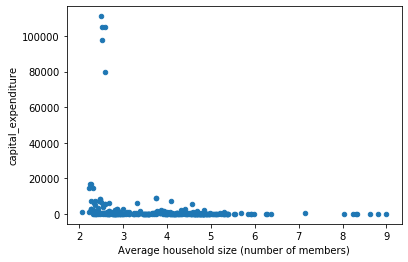

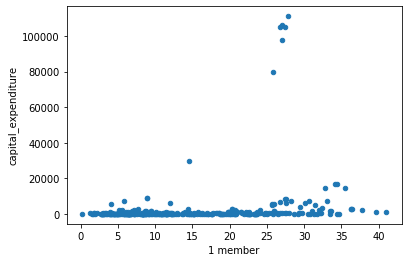

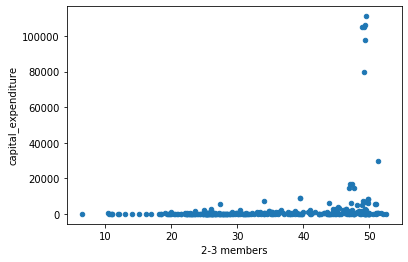

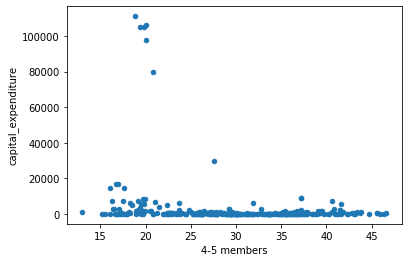

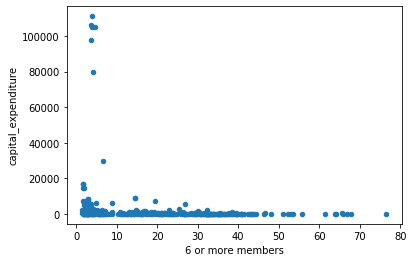

In [36]:
# draw scatter plot
for col in household_col:
    ax = two_merge.plot.scatter(x=col,y='capital_expenditure')

From the above plot, it looks at first glance with no obvious study direction on relationships. And this is what I have done so far, I still need more time to discover more and further relationship about this relationship. 

## Summary and Future work

### Summary of the conclusions reached above

Above work focused on the process of data and test of each hypothese. Let's look back on the three hypothese:

1. As the increase of fuel export and decrease of Forest Coverage, the annual health expenditure per capital would increase accordingly.
2. The health expenditure per capital or expenditure by revenue may have a linear relationship with GDP.
3. The health expenditure per capital or expenditure by revenue may have relation with the household scale.

And the related conclusions:

1. Generally there is no significant relationship between capital expenditure and forest coverage or fuel export no matter from the total data or divided as different years of data. However, when treated seperatively as different country, some countries have very high relation while some countries not. And the above study can show the detail that as the increase of fuel export or decrease of forest coverage, which countries ' annual health expenditure per capital would increase or decrease accordingly.
2. No matter from the general total data or data divided by year, so far I consider there is highly possible that a linear corelation exists between the expenditure and gdp, but there maybe other middle or multi variables between them so more other varibles need to be test and study later.
3. No obvious relationships exist between health expeniture and household scale.

### Where to improve and future work

1. About the hypothese 2 and 3, there is still along way to go because more other trlated variables can be inputed to test so that to make sure if there is a linear or pure relationship between the studying objects.
2. The analysis is not deep enough to get further conclusion, what I have done is more likely to be on the surface and not deep enough.
3. Programminf skills need to be improved because these took me a lot of time and obviously more need to be learnt.

So, for the future, I would improve these dimension I listed and return a better result for the project.

## Detailed resources

Household original data: 

https://population.un.org/Household/index.html#/countries/840

The orginal combined data including forest coverage, gdp, fuel export etc. : 

https://databank.worldbank.org/reports.aspx?source=2&series=AG.LND.FRST.ZS&country=

The orginal data of about the expenditure: 

https://apps.who.int/nha/database

Simple introduction of conducting Linear Regression: 

https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

Linear Regression Example using statsmodels: 
    
https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/